In [59]:
links = []
with open('./links/1.txt', 'r') as file:
    # Read and process each line
    for line in file:
        splitted = line.split(" ")
        n = int(splitted[0])
        nprime = int(splitted[1])
        links.append((n, nprime))


In [60]:
counter = 0
titles = {}
with open('./titles/1.txt', 'r') as file:
    # Read and process each line
    for line in file:
        counter+=1
        titles[counter] = line
degrees_in = {}
degrees_out = {}

for nnprime in links:
    n = nnprime[0]
    nprime = nnprime[1]

    if(n in degrees_out.keys()):
        degrees_out[n].append(nprime)
    else:
        degrees_out[n] = [nprime]

    if(nprime in degrees_in.keys()):
        degrees_in[nprime].append(n)
    else:
        degrees_in[nprime] = [n]

In [61]:
num_degrees_in = {}
num_degrees_out = {}
for i in degrees_in:
    num_degrees_in[i] = len(degrees_in[i])
for i in degrees_out:
    num_degrees_out[i] = len(degrees_out[i])
sorted_degrees_in = dict(sorted(num_degrees_in.items(), key=lambda x: x[1], reverse=True))
sorted_degrees_out = dict(sorted(num_degrees_out.items(), key=lambda x: x[1], reverse=True))

list1 = []
list2 = []

node_ids_list1 = []
node_ids_list2 = []

normalized_in_degree = {}
normalized_out_degree = {}


for i in sorted_degrees_in:
    node_ids_list1.append(i)
    normalized_in_degree[i] = num_degrees_in[i]/(len(links))
    if(i in sorted_degrees_out.keys()):
        list1.append((degrees_in[i], degrees_out[i]))
    else:
        list1.append((degrees_in[i], []))

for i in sorted_degrees_out:
    normalized_out_degree[i] = num_degrees_out[i]/(len(links))
    node_ids_list2.append(i)
    if(i in sorted_degrees_in.keys()):
        list2.append((degrees_in[i], degrees_out[i])) 
    else:
        list2.append(([], degrees_out[i]))

In [62]:
print("IN DEGREES")
for node_id in node_ids_list1[:5]:
    title = titles[node_id]
    print(title, round(normalized_in_degree[node_id],6), round(normalized_out_degree[node_id],6))

print("OUT DEGREES")
for node_id in node_ids_list2[:5]:
    title = titles[node_id]
    print(title, round(normalized_out_degree[node_id],6), round(normalized_in_degree[node_id],6))

IN DEGREES
United_States
 0.008958 0.000301
2007
 0.006451 0.001657
2008
 0.006422 0.00162
2006
 0.004626 0.000154
2005
 0.004017 0.001539
OUT DEGREES
Black_Hebrew_Israelites
 0.002309 5.1e-05
Colorado_Eastern_Plains
 0.002163 0.000154
Business_Link
 0.002133 1.5e-05
Andorra_la_Vella
 0.002126 2.2e-05
Arizona_Stadium
 0.002089 7e-06


## TASK 2

In [63]:
def normalize(dictionary):
    tot = sum(dictionary.values())
    for key in dictionary.keys():
        dictionary[key] = dictionary[key]/tot
    return dictionary

def get_new_hub_score(degrees_out, auths):
    #iterate over all hubs to update
    new_hub = {}
    for hub_node in degrees_out.keys():
        #gets all the nodes pointing to hub node
        new_hub_score = 0
        for auth_node in degrees_out[hub_node]:
            new_hub_score += auths[auth_node]
        new_hub[hub_node] = new_hub_score
    return normalize(new_hub)

def get_new_auth_score(degrees_in, hubs):
    new_auth = {}
    for auth_node in degrees_in.keys():
        new_auth_score = 0
        for out_node in degrees_in[auth_node]:
            new_auth_score += hubs[out_node]
        new_auth[auth_node] = new_auth_score
    return normalize(new_auth)

hubs = normalized_out_degree
auths = normalized_in_degree

for i in range(100):
    hubs = get_new_hub_score(degrees_out, auths)
    auths = get_new_auth_score(degrees_in, hubs)


sorted_on_hub_score = dict(sorted(hubs.items(), key=lambda x: x[1], reverse=True))
sorted_on_auth_score = dict(sorted(auths.items(), key=lambda x: x[1], reverse=True))

top5_hubs = list(sorted_on_hub_score.keys())[:5]
top5_auths = list(sorted_on_auth_score.keys())[:5]
print("HUB")
for i in top5_hubs:
    if(i not in sorted_on_auth_score.keys()):
        print(titles[i], round(sorted_on_hub_score[i],6), 0.00)
    else:
        print(titles[i], round(sorted_on_hub_score[i],6), round(sorted_on_auth_score[i],6))

print("AUTH")
for i in top5_auths:
    if(i not in sorted_on_hub_score.keys()):
        print(titles[i], round(sorted_on_auth_score[i],6), 0.00)
    else:
        print(titles[i], round(sorted_on_auth_score[i],6), round(sorted_on_hub_score[i],6))


HUB
Arizona_Stadium
 0.003468 1e-06
American_Civil_Rights_Movement_(1896-1954)
 0.00344 8e-06
Delta_Southern_Railroad
 0.003414 0.000192
1988
 0.003408 0.000891
Area
 0.003394 0.000195
AUTH
North_America
 0.003501 0.0
New_York,_Susquehanna_and_Western_Railway
 0.003439 1e-06
Utah_Railway
 0.003435 0.000109
Bay_Line_Railroad
 0.003411 0.001149
Amtrak
 0.003407 4.4e-05



## TASK 3

In [71]:
import numpy as np
import scipy.sparse as sp
cols, rows = zip(*[(i - 1, j - 1) for i, j in links])
data = np.ones(len(rows), dtype=int)

# Create the sparse matrix using coo_matrix
size = len(list(titles.keys()))
sparse_matrix = sp.coo_matrix((data, (rows, cols)), shape=(size, size), dtype=np.float64)

# Calculate the eigenvector centrality
eigen_value, eigen_vector = sp.linalg.eigs(sparse_matrix,k=1, which="LR")  # Use transpose for right eigenvector
eigen_vector = np.abs(eigen_vector.flatten())
eigen_vector /= eigen_vector.sum()

sorted_indices = np.argsort(eigen_vector)[::-1]

# Get the values and indices of the first 5 elements
top5_eigen = eigen_vector[sorted_indices[:5]]
top5_eigen_indices = sorted_indices[:5]
for i in top5_eigen_indices:
    print(titles[i+1], round(eigen_vector[i],6))

United_States
 0.00889
2007
 0.006224
2008
 0.006219
2006
 0.004626
2005
 0.004162


## TASK 4


In [65]:
eigen_value = np.real(eigen_value)

alpha = (0.85*(1/abs(eigen_value)))
num_nodes = len(titles.keys())

I = np.identity(num_nodes)
u = np.ones(num_nodes)

A = sparse_matrix.toarray()

te = (I-alpha*A)

inverted = np.linalg.inv(te)

centrality_vector = (1/num_nodes)*inverted@u
centrality_vector /= centrality_vector.sum()

sorted_katz = np.argsort(centrality_vector)[::-1]

# Get the values and indices of the first 5 elements
katz_top5 = centrality_vector[sorted_katz[:5]]
top5_eigen_indices = sorted_katz[:5]
for i in sorted_katz[:5]:
    print(titles[i+1], round(centrality_vector[i],6))


United_States
 0.007532
2007
 0.005309
2008
 0.005308
2006
 0.003935
2005
 0.003534


## TASK 5

In [66]:
cop = num_degrees_out.copy()
kout = []
for i in range(1, num_nodes+1):
    if(i not in cop.keys()):
        kout.append(0)
    else:
        kout.append(1/cop[i])
H = A * kout
alpha = 0.85
u = np.ones(num_nodes)
I = np.identity(num_nodes)
aH = alpha*H
inverted = np.linalg.inv(I-aH)
closed_gp = ((1-alpha)/num_nodes)*inverted@u
closed_gp /= closed_gp.sum()

sorted_closed_gp = np.argsort(closed_gp)[::-1]

for i in sorted_closed_gp[:5]:
    print(titles[i+1], round(closed_gp[i],6))

United_States
 0.017003
2007
 0.011259
2008
 0.010662
Wikimedia_Commons
 0.007094
Geographic_coordinate_system
 0.007037


## TASK 6


In [67]:
H = A * kout

for i in range(num_nodes):
    for j in range(num_nodes):
        if(A[i][j] == 0 and kout[j]==0):
            H[i][j] = 1/num_nodes

In [68]:


alpha = 0.85
uut = np.ones((num_nodes, num_nodes))
G = alpha * H + ((1 - alpha) / num_nodes) * uut

pg_vector = np.ones(num_nodes) / num_nodes
num_iterations = 100

iterations_values = []

for i in range(num_iterations):
    pg_vector = G @ pg_vector
    pg_vector /= pg_vector.sum()
    iterations_values.append(pg_vector)

# Normalize once after the loop
#pg_vector /= pg_vector.sum()


In [69]:

top_three = sorted_closed_gp[:3]
num1 = []
num2 = []
num3 = []

for i in range(num_iterations):
    num1.append(iterations_values[i][top_three[0]])
    num2.append(iterations_values[i][top_three[1]])
    num3.append(iterations_values[i][top_three[2]])


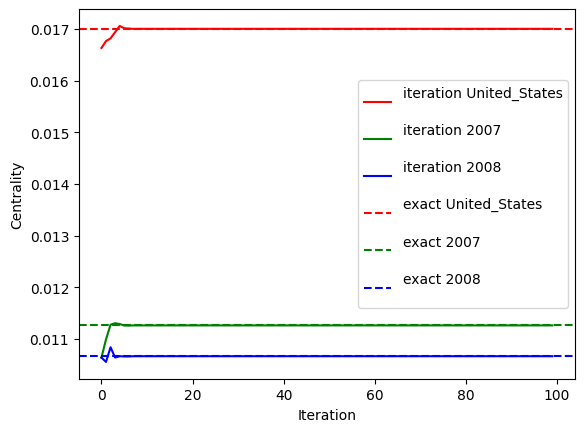

In [70]:
import matplotlib.pyplot as plt

x = range(num_iterations)

plt.plot(x, num1, color='r', label=f"iteration {titles[top_three[0]+1]}")
plt.plot(x, num2, color='g', label=f"iteration {titles[top_three[1]+1]}")
plt.plot(x, num3, color='b', label=f"iteration {titles[top_three[2]+1]}")

plt.axhline(y=closed_gp[top_three[0]], color='r', linestyle='--', label=f"exact {titles[top_three[0]+1]}")
plt.axhline(y=closed_gp[top_three[1]], color='g', linestyle='--', label=f"exact {titles[top_three[1]+1]}")
plt.axhline(y=closed_gp[top_three[2]], color='b', linestyle='--', label=f"exact {titles[top_three[2]+1]}")

# Adding labels and legend
plt.xlabel('Iteration')
plt.ylabel('Centrality')
plt.legend()

# Display the plot
plt.show()


## TASK 7

1. The in degree centrality for in, is pretty similar to the result of other ones. However it doesnt take in to consideration how the rest of the structure how the network looks like, so a node could have alot of not important nodes and still get a high centrality values. (spam links to website)

2. Hub centrality is a measure of how good it connects to the network, similar to out-degree but also takes into considerations the in-degree of the nodes it is pointing to. Authority centrality measure of how good nodes is linked to by other nodes with high out-degree. 

3. Takes into consideration both in and out connections of nodes. Nodes pointed to by a single high centrality node will receive high score even though it main not be essential at all. Nodes wihout incoming will be zero, may not converge.

4. Almost the same as eigenvector centrality but makes sure that nodes with no incoming links will get some centrality for free. Similar results to eigenvector but the highest scoring got a little lower values, because how the initial free centrality to some nodes. 

5. Solves the three main problems of the eigenvector centrality. Made the top nodes have a higher centrality score, because pagerank gives nodes that have a more global impact a higher centrality score.

## TASK 8

They all have different use cases. #1 is good to get some general knowledge of how different nodes are central or not. #2 to find some important nodes seen out different perspectives. #3 find influential nodes #4 similar to #3 but makes nodes with no incoming links also have some authority in the network. #5 best to use to rank web pages get a better global perspective.